<a href="https://colab.research.google.com/github/Entro01/ML-starter/blob/main/makemore_bigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
words = open('names.txt', 'r').read().splitlines()

In [56]:
print(words[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [57]:
print(min(len(x) for x in words))
print(max(len(x) for x in words))

2
15


In [58]:
#bigram - only dealing with two characters at a time, always looking at the previous characater to predict the next one.

b = {}
for x in words:
  x = ['<S>'] + list(x) + ['<E>']
  for i,j in zip(x, x[1:]):
    biagram = (i, j)
    b[biagram] = b.get(biagram, 0) + 1
print(b)

{('<S>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<E>'): 6640, ('<S>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<S>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<S>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<S>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<S>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<E>'): 3983, ('<S>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<S>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<E>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<E>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1345,

In [ ]:
#sorted(b.items(), key = lambda k : -k[1])

In [60]:
import torch

N = torch.zeros((27, 27), dtype = torch.int32)

In [61]:
chrs = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i,s in enumerate(chrs)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [62]:
for x in words:
  x = ['.'] + list(x) + ['.']
  for i,j in zip(x, x[1:]):
    ii = stoi[i]
    ji = stoi[j]
    N[ii, ji] += 1

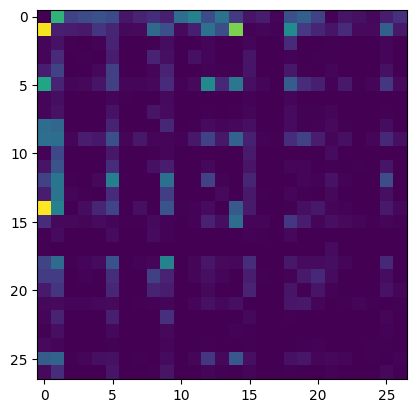

In [63]:
import matplotlib.pyplot as plt

plt.imshow(N)

In [64]:
P = (N+1).float() # N + 1 to remove the 0 values so that the model doesnt produce an infinite nll for the baigrams that dont appear in the training set (model smoothing)
P = P / P.sum(1, keepdim = True)

In [65]:
P[0].sum()

tensor(1.)

In [66]:
# generating new names

g = torch.Generator().manual_seed(2147483647)
for i in range(10):
  ix = 0
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [67]:
# evaluating the quality of the model
# our goal is to maximize the likelihood of the data wrt model parameters
# maximizing the likelihood = maximizing the log likelihood = minimizing the negative log likelihood = minimizing the average negative log likelihood

log_likelihood = 0.0
n = 0
for x in ["karajan"]:
#for x in words:
  x = ['.'] + list(x) + ['.']
  for i,j in zip(x, x[1:]):
    ii = stoi[i]
    ji = stoi[j]
    logprob = torch.log(P[ii, ji])
    log_likelihood += logprob
    n += 1
    print(f'{i}{j}: {logprob:.4f}')
print(f'log likelihood: {log_likelihood}')
nll = -log_likelihood
print(f'nll: {nll / n}')

.k: -2.3811
ka: -1.0735
ar: -2.3405
ra: -1.6863
aj: -5.2610
ja: -0.6860
an: -1.8302
n.: -0.9982
log likelihood: -16.256832122802734
nll: 2.032104015350342


In [68]:
# using gradient based optimization to tune the parameters of a neural network to minimize the loss function (nll)

In [73]:
# creating the training set (x,y)

xs, ys = [], []

for x in words[:1]:
  x = ['.'] + list(x) + ['.']
  for i,j in zip(x, x[1:]):
    ii = stoi[i]
    ji = stoi[j]
    xs.append(ii)
    ys.append(ji)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [80]:
# one hot encoding

import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [77]:
xenc.shape

torch.Size([5, 27])

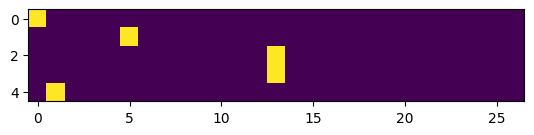

In [78]:
plt.imshow(xenc)

In [81]:
xenc.dtype

torch.float32

In [82]:
# creating neurons
# the individual rows of the W matrix represents the different classes in the input and the individual columns represent the weights of the individual neurons.

W = torch.randn(27,27) # creating 27 neurons

# this layer of neurons is a linear layer, it doesnt have a bias

xenc @ W

# (5,27) . (27, 27) --> (5,27)
# this is the neurons activations on these  inputs

tensor([[ 0.1092,  0.2742,  0.2885, -0.1396, -0.0766, -1.0868, -2.6215,  0.0315,
         -0.6325, -1.3537, -1.8859, -0.3963, -0.0464, -0.2170, -0.2378, -0.2630,
         -1.9911,  0.6552, -1.4533,  0.4167, -0.5297, -0.1792,  0.7645,  0.0702,
          1.3031,  0.0967,  0.0690],
        [ 0.4209,  2.2891,  0.8412,  0.9698,  0.9364, -0.5110, -0.5045, -1.6033,
          0.4458,  0.7534,  0.3266,  1.2652, -0.8291, -2.4268,  0.9329, -0.7606,
         -0.3757, -1.1350,  0.0496, -0.0580,  0.2321,  1.6388, -0.4769,  0.7078,
          1.1776,  0.4906,  0.3000],
        [-2.1381,  0.8158, -0.0077,  1.2741, -0.9357, -0.3678,  0.2618,  1.2653,
          0.6494, -0.0352, -0.3683,  0.4409, -0.3454,  1.9086,  1.8892,  0.7723,
          1.1375,  0.0202, -1.2582, -1.7020, -0.0768,  0.4929, -1.8411, -1.2556,
          0.1823, -0.0580,  1.2015],
        [-2.1381,  0.8158, -0.0077,  1.2741, -0.9357, -0.3678,  0.2618,  1.2653,
          0.6494, -0.0352, -0.3683,  0.4409, -0.3454,  1.9086,  1.8892,  0.7723

In [84]:
(xenc @ W)[2,15] # the firing rate of 15th neuron looking at the 2nd input

tensor(0.7723)